In [3]:
import random
import pandas as pd

# Define job roles and associated skills
job_skills = {
    'python developer senior': ['python', 'flask', 'machine learning', 'deep learning', 'AI', 'API'],
    'python developer junior': ['python', 'flask', 'machine learning', 'API'],
    'frontend developer junior': ['html', 'css', 'javascript', 'react', 'vue'],
    'frontend developer senior': ['html', 'css', 'javascript', 'react', 'vue', 'redux', 'typescript'],
    'backend developer junior': ['python', 'django', 'flask', 'sql', 'postgresql'],
    'backend developer senior': ['python', 'django', 'flask', 'sql', 'postgresql', 'API', 'docker'],
    'java developer junior': ['java', 'spring', 'hibernate', 'sql', 'servlet'],
    'java developer senior': ['java', 'spring', 'hibernate', 'sql', 'microservices', 'JPA', 'API'],
    'app developer junior': ['android', 'ios', 'java', 'swift', 'flutter'],
    'app developer senior': ['android', 'ios', 'java', 'swift', 'flutter', 'API', 'kotlin']
}

# Define a general pool of irrelevant skills to randomize skill sets
general_skills = ['photoshop', 'seo', 'content writing', 'project management', 'docker', 'kotlin', 'ruby', 'aws', 'nodejs']

# Define experience requirements for each job
experience_thresholds = {
    'junior': (0, 3),
    'senior': (4, 10)
}

# Function to generate random skills for a job
def generate_random_skills(job, experience_level):
    required_skills = job_skills[job]
    
    # Number of skills based on experience level
    min_required_skills = 3 if experience_level == 'senior' else 2
    selected_skills = random.sample(required_skills, min_required_skills)
    
    # Add irrelevant skills to mix it up, make total 5 skills
    additional_skills = random.sample(general_skills, 5 - len(selected_skills))
    
    # Return combined set of random skills
    return selected_skills + additional_skills

# Function to determine whether the candidate is selected or not
def determine_selection(job, experience, skills):
    required_skills = set(job_skills[job])
    experience_level = 'senior' if 'senior' in job else 'junior'
    experience_range = experience_thresholds[experience_level]
    
    # Check if experience is within the expected range and skills match at least 3 for senior or 2 for junior
    matching_skills = len(required_skills.intersection(skills))
    if experience >= experience_range[0] and experience <= experience_range[1]:
        if (experience_level == 'senior' and matching_skills >=4 ) or (experience_level == 'junior' and matching_skills <= 2):
            return 1  # Selected
    return 0  # Not selected

# Function to generate the dataset
def generate_dataset(num_rows=500):
    data = []
    
    for _ in range(num_rows):
        job = random.choice(list(job_skills.keys()))
        experience_level = 'senior' if 'senior' in job else 'junior'
        experience = random.randint(*experience_thresholds[experience_level])
        skills = generate_random_skills(job, experience_level)
        output = determine_selection(job, experience, skills)
        
        # Append the row
        data.append([experience, skills, job, output])
    
    # Create a pandas DataFrame
    df = pd.DataFrame(data, columns=['Experience', 'Skills', 'Job Applying For', 'Selected'])
    return df

# Generate the dataset and print the first few rows
dataset = generate_dataset(500)
print(dataset.head())

# Save the dataset to a CSV file
dataset.to_csv('generated_job_candidates.csv', index=False)


   Experience                                             Skills  \
0           9  [flutter, android, swift, aws, project managem...   
1           2              [python, django, aws, nodejs, docker]   
2           8      [android, kotlin, API, content writing, ruby]   
3           5               [android, java, API, docker, nodejs]   
4           3             [postgresql, flask, aws, docker, ruby]   

           Job Applying For  Selected  
0      app developer senior         0  
1  backend developer junior         1  
2      app developer senior         0  
3      app developer senior         0  
4  backend developer junior         1  


In [8]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

dataset = generate_dataset(2000)

# Preprocessing the dataset
# Step 1: Convert 'Job Applying For' to numerical values using one-hot encoding
job_dummies = pd.get_dummies(dataset['Job Applying For'])

# Step 2: Convert 'Skills' (list of skills) to numerical values using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
skills_dummies = pd.DataFrame(mlb.fit_transform(dataset['Skills']), columns=mlb.classes_)

# Step 3: Combine numerical features (experience, job dummies, and skill dummies)
X = pd.concat([dataset['Experience'], job_dummies, skills_dummies], axis=1)
y = dataset['Selected']  # Target variable (Selected: 0 or 1)

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize features for models like SVM and k-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate and print model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

### 1. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
evaluate_model(logreg, X_train_scaled, X_test_scaled, y_train, y_test)

### 2. Decision Tree
dtree = DecisionTreeClassifier()
evaluate_model(dtree, X_train, X_test, y_train, y_test)

### 3. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf, X_train, X_test, y_train, y_test)

### 4. Support Vector Machine (SVM)
svm = SVC(kernel='linear')  # You can experiment with different kernels like 'rbf'
evaluate_model(svm, X_train_scaled, X_test_scaled, y_train, y_test)

### 5. k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, X_train_scaled, X_test_scaled, y_train, y_test)


Model: LogisticRegression
Accuracy: 0.9817
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       281
           1       1.00      0.97      0.98       319

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600


Model: DecisionTreeClassifier
Accuracy: 0.9717
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       281
           1       0.98      0.97      0.97       319

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600


Model: RandomForestClassifier
Accuracy: 0.9733
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       281
           1       1.00      

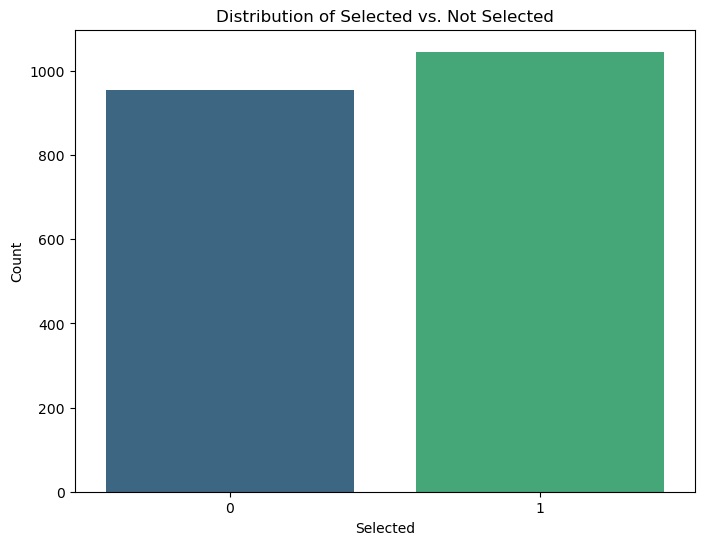

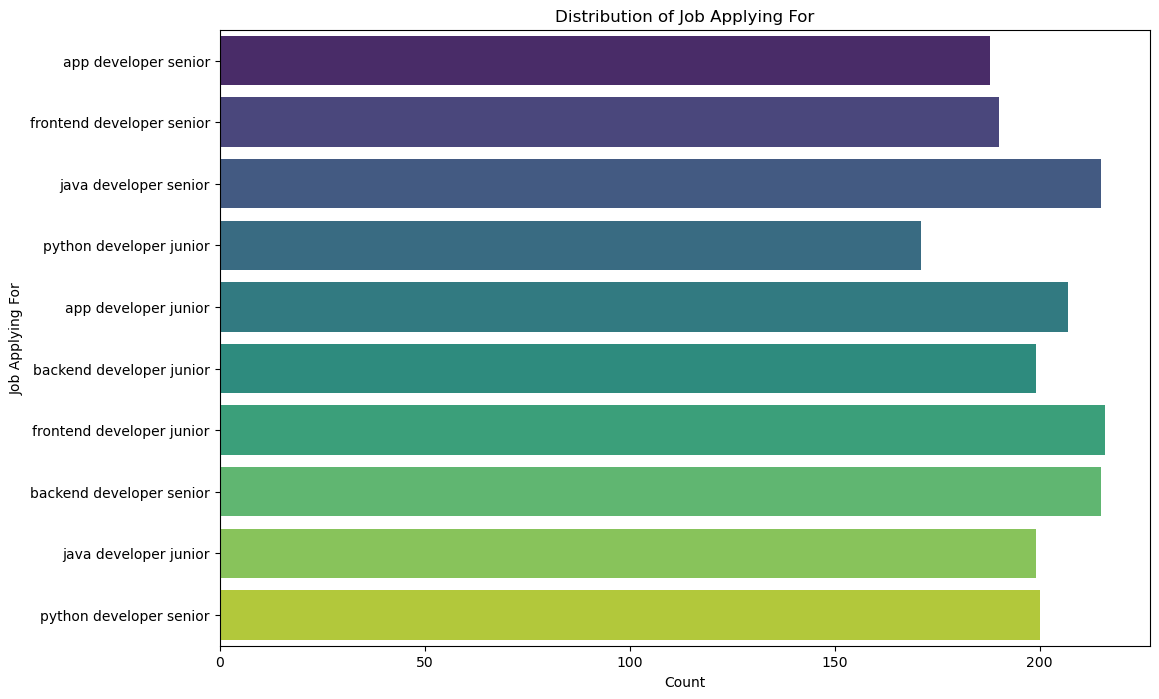

Target Variable Distribution:
 Selected
1    1046
0     954
Name: count, dtype: int64
Job Roles Distribution:
 Job Applying For
frontend developer junior    216
java developer senior        215
backend developer senior     215
app developer junior         207
python developer senior      200
backend developer junior     199
java developer junior        199
frontend developer senior    190
app developer senior         188
python developer junior      171
Name: count, dtype: int64


In [9]:
# Plot distribution of the target variable 'Selected'
plt.figure(figsize=(8, 6))
sns.countplot(x='Selected', data=dataset, palette='viridis')
plt.title('Distribution of Selected vs. Not Selected')
plt.xlabel('Selected')
plt.ylabel('Count')
plt.show()

# Plot distribution of different job roles
plt.figure(figsize=(12, 8))
sns.countplot(y='Job Applying For', data=dataset, palette='viridis')
plt.title('Distribution of Job Applying For')
plt.xlabel('Count')
plt.ylabel('Job Applying For')
plt.show()

# Display class counts for further inspection
print("Target Variable Distribution:\n", dataset['Selected'].value_counts())
print("Job Roles Distribution:\n", dataset['Job Applying For'].value_counts())

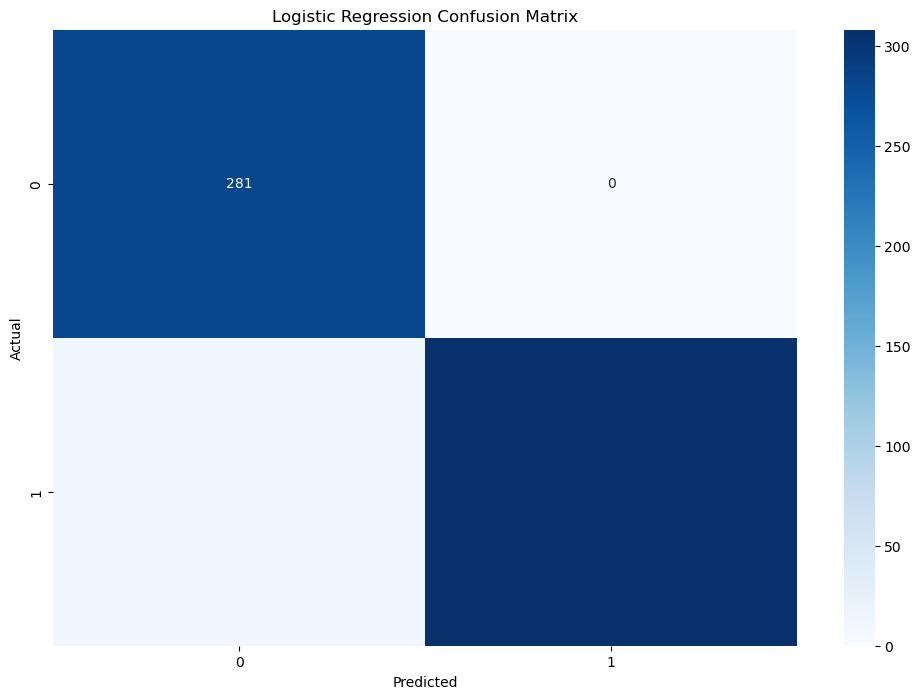

Logistic Regression F1 Score:  0.9824561403508771


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, confusion_matrix

# Preprocessing the dataset
job_dummies = pd.get_dummies(dataset['Job Applying For'])
skills_dummies = pd.DataFrame(mlb.fit_transform(dataset['Skills']), columns=mlb.classes_)
X = pd.concat([dataset['Experience'], job_dummies, skills_dummies], axis=1)
y = dataset['Selected']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Logistic Regression F1 Score: ", f1_score(y_test, y_pred))


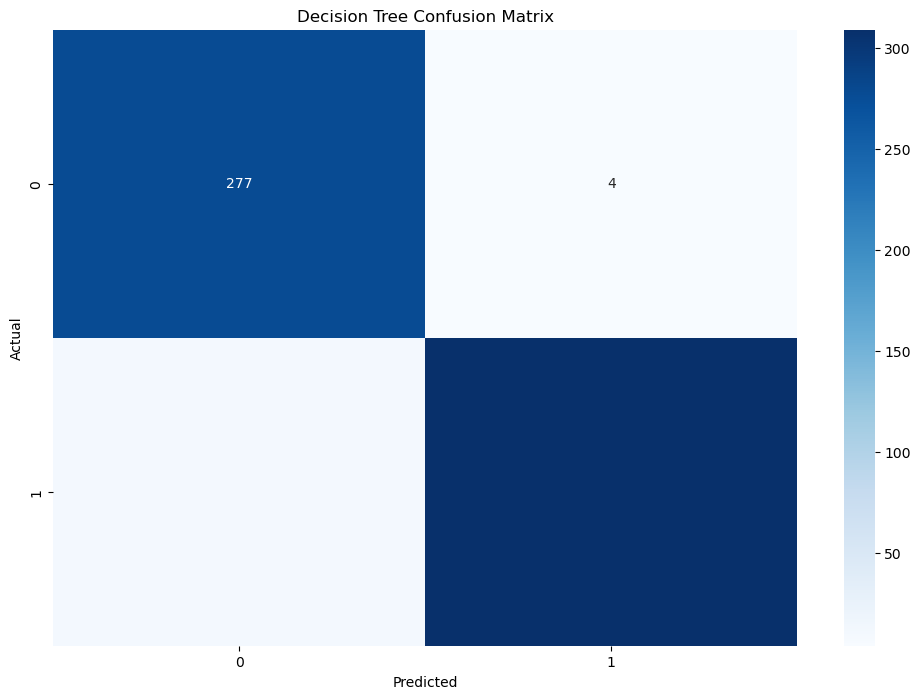

Decision Tree F1 Score:  0.9778481012658227


In [11]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Decision Tree F1 Score: ", f1_score(y_test, y_pred))


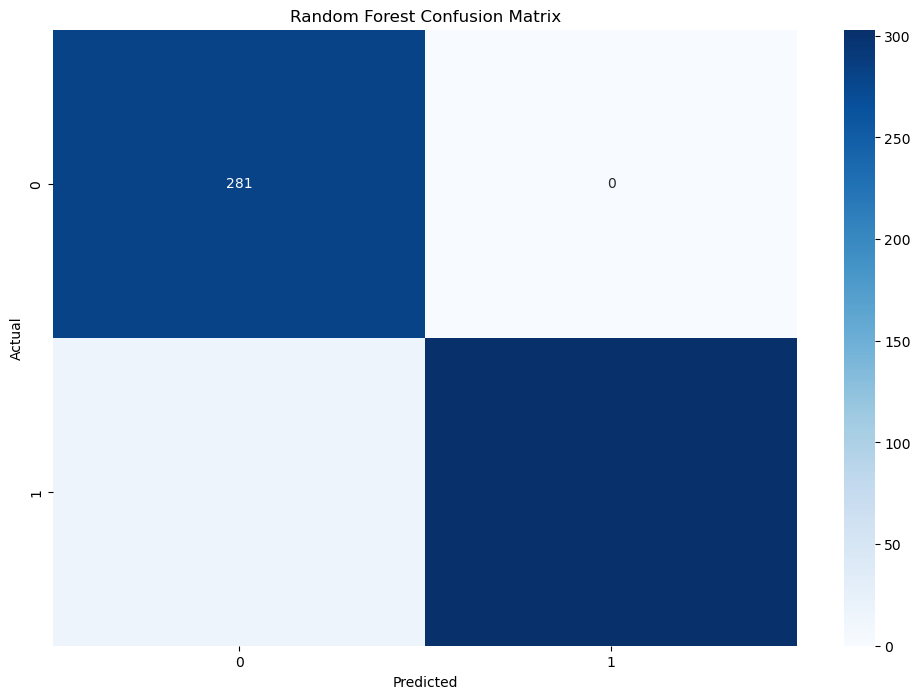

Random Forest F1 Score:  0.9742765273311896


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Random Forest F1 Score: ", f1_score(y_test, y_pred))


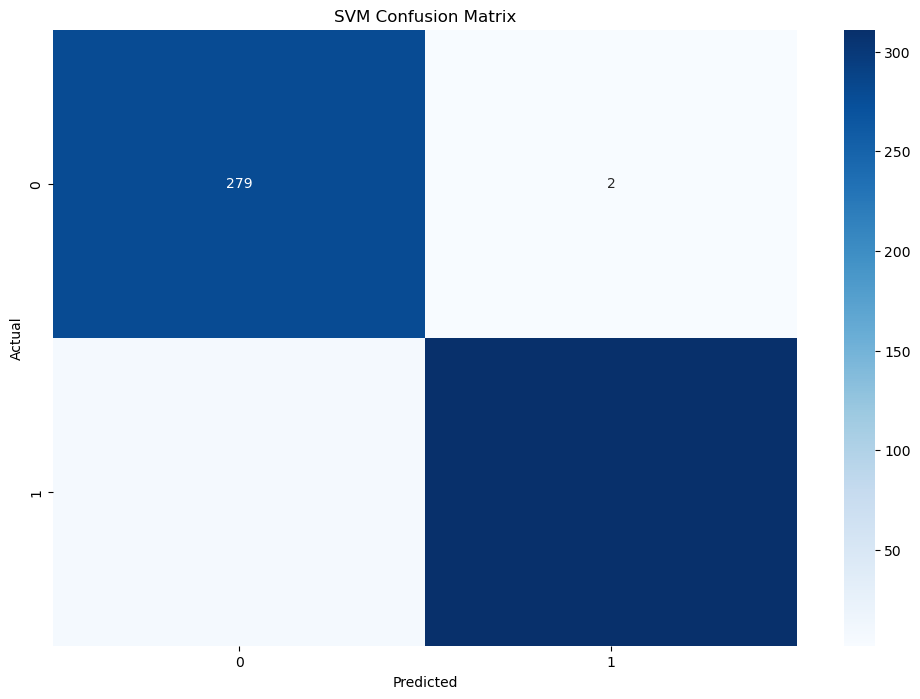

SVM F1 Score:  0.9841772151898734


In [13]:
from sklearn.svm import SVC

# SVM
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("SVM F1 Score: ", f1_score(y_test, y_pred))


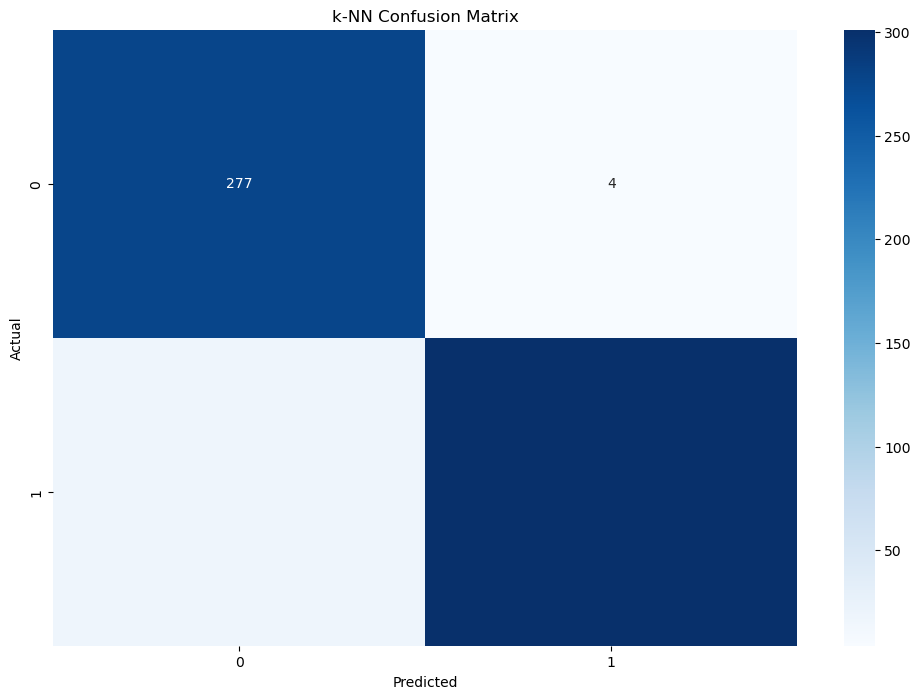

k-NN F1 Score:  0.9647435897435898


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('k-NN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("k-NN F1 Score: ", f1_score(y_test, y_pred))


In [16]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# Function to print all relevant metrics
def print_metrics(y_test, y_pred, model_name):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = tn / (tn + fp)  # Specificity (True Negative Rate)
    
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Confusion Matrix:\n {cm}")
    
   
    print("\n")

# Sample Logistic Regression example
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
print_metrics(y_test, y_pred_logreg, "Logistic Regression")

# Decision Tree example
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print_metrics(y_test, y_pred_dtree, "Decision Tree")

# Random Forest example
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print_metrics(y_test, y_pred_rf, "Random Forest")

# SVM example
svm = SVC(kernel='linear', probability=True)  # Enable probability predictions for ROC-AUC
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print_metrics(y_test, y_pred_svm, "SVM")

# k-NN example
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print_metrics(y_test, y_pred_knn, "k-NN")


--- Logistic Regression ---
Accuracy: 0.9817
Precision: 1.0000
Recall: 0.9655
F1 Score: 0.9825
Specificity: 1.0000
Confusion Matrix:
 [[281   0]
 [ 11 308]]


--- Decision Tree ---
Accuracy: 0.9733
Precision: 0.9871
Recall: 0.9624
F1 Score: 0.9746
Specificity: 0.9858
Confusion Matrix:
 [[277   4]
 [ 12 307]]


--- Random Forest ---
Accuracy: 0.9733
Precision: 1.0000
Recall: 0.9498
F1 Score: 0.9743
Specificity: 1.0000
Confusion Matrix:
 [[281   0]
 [ 16 303]]


--- SVM ---
Accuracy: 0.9833
Precision: 0.9936
Recall: 0.9749
F1 Score: 0.9842
Specificity: 0.9929
Confusion Matrix:
 [[279   2]
 [  8 311]]


--- k-NN ---
Accuracy: 0.9633
Precision: 0.9869
Recall: 0.9436
F1 Score: 0.9647
Specificity: 0.9858
Confusion Matrix:
 [[277   4]
 [ 18 301]]




In [17]:

def apply_feedback(dataset, feedback):
    """
    Function to apply feedback to the dataset.
    
    Feedback format:
    feedback = [
        {'index': 2, 'Selected': 1},  # Change the 'Selected' value for row 2
        {'index': 10, 'Experience': 5, 'Skills': ['Java', 'Spring', 'API'], 'Job Applying For': 'java developer senior'},
        {'index': 50, 'Selected': 0, 'Experience': 1, 'Skills': ['HTML', 'CSS', 'JavaScript'], 'Job Applying For': 'frontend developer junior'}
    ]
    """
    for fb in feedback:
        index = fb['index']
        if 'Selected' in fb:
            dataset.at[index, 'Selected'] = fb['Selected']
        if 'Experience' in fb:
            dataset.at[index, 'Experience'] = fb['Experience']
        if 'Skills' in fb:
            dataset.at[index, 'Skills'] = fb['Skills']
        if 'Job Applying For' in fb:
            dataset.at[index, 'Job Applying For'] = fb['Job Applying For']
    return dataset

feedback = [
    {'index': 2, 'Selected': 1},  # Update row 2 to selected
    {'index': 10, 'Experience': 6, 'Skills': ['Java', 'Spring', 'Microservices'], 'Job Applying For': 'java developer senior'},
    {'index': 20, 'Selected': 0, 'Experience': 2, 'Skills': ['HTML', 'CSS'], 'Job Applying For': 'frontend developer junior'}
]

# Apply the feedback to the dataset
updated_dataset = apply_feedback(dataset.copy(), feedback)

print("\nUpdated dataset after feedback:")
print(updated_dataset.loc[[2, 10, 20]])



Updated dataset after feedback:
    Experience                                           Skills  \
2            4  [java, hibernate, API, project management, aws]   
10           6                    [Java, Spring, Microservices]   
20           2                                      [HTML, CSS]   

             Job Applying For  Selected  
2       java developer senior         1  
10      java developer senior         1  
20  frontend developer junior         0  


In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Assume X_train, X_test, y_train, y_test are already prepared from your dataset

# 1. Define the 5 models (trained earlier but shown here for clarity)
logreg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier()
rforest = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(probability=True)  # Enable probability for soft voting

# 2. Create the VotingClassifier (Ensemble)
# You can switch between 'hard' and 'soft' voting by changing the 'voting' parameter
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg), 
    ('dtree', dtree), 
    ('rforest', rforest), 
    ('knn', knn), 
    ('svm', svm)], 
    voting='soft'  # Change to 'hard' if you want hard voting
)

# 3. Train the ensemble model
voting_clf.fit(X_train, y_train)

# 4. Make predictions with the ensemble model
y_pred_ensemble = voting_clf.predict(X_test)

# 5. Evaluate the ensemble model
def print_metrics(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print()

# Print the metrics for the ensemble model
print_metrics(y_test, y_pred_ensemble, 'Voting Ensemble')


Voting Ensemble Performance:
Accuracy: 0.9700
Precision: 1.0000
Recall: 0.9436
F1 Score: 0.9710



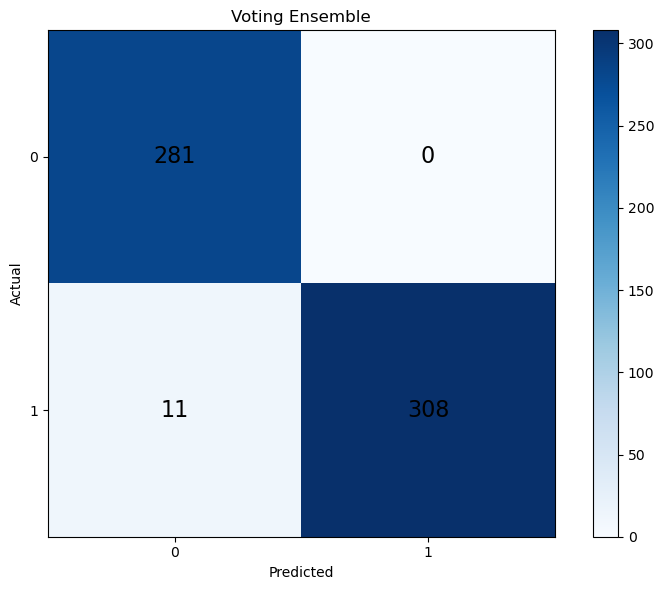

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix values
conf_matrix = np.array([[281, 0], [11, 308]])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the matrix as an image using imshow
cax = ax.imshow(conf_matrix, cmap='Blues', interpolation='nearest')

# Add colorbar
fig.colorbar(cax)

# Add labels
ax.set_title('Voting Ensemble')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Define the labels for the x and y axes
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['0', '1'])
ax.set_yticklabels(['0', '1'])

# Add text annotations inside the squares
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center", color="black", fontsize=16)

# Adjust layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()


Voting Ensemble Performance:
Accuracy: 0.9700
Precision: 1.0000
Recall: 0.9436
F1 Score: 0.9710

[[281   0]
 [ 18 301]]


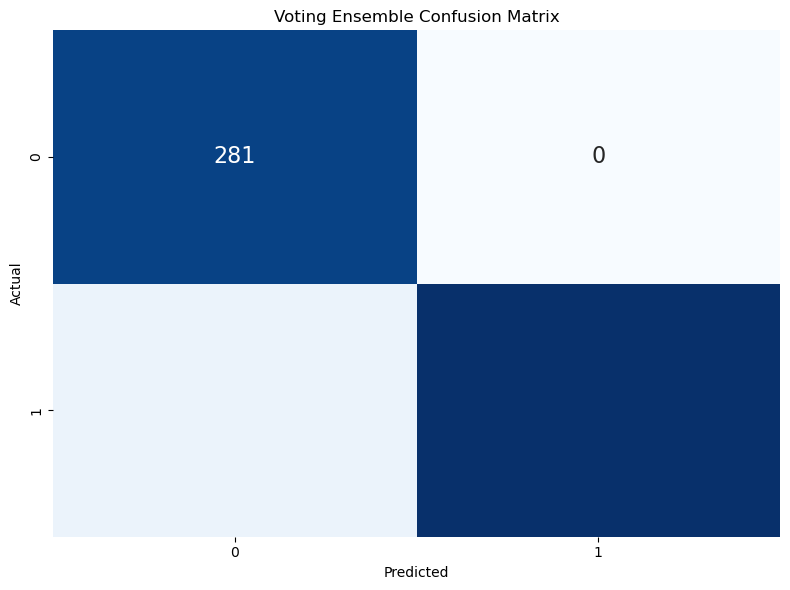

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Assume X_train, X_test, y_train, y_test are already prepared from your dataset

# 1. Define the 5 models (trained earlier but shown here for clarity)
logreg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier()
rforest = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(probability=True)  # Enable probability for soft voting

# 2. Create the VotingClassifier (Ensemble)
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg), 
    ('dtree', dtree), 
    ('rforest', rforest), 
    ('knn', knn), 
    ('svm', svm)], 
    voting='soft'  # Change to 'hard' if you want hard voting
)

# 3. Train the ensemble model
voting_clf.fit(X_train, y_train)

# 4. Make predictions with the ensemble model
y_pred_ensemble = voting_clf.predict(X_test)

# 5. Function to print metrics and plot confusion matrix
def print_metrics_and_confusion_matrix(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print()
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    print(conf_matrix)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# 6. Print the metrics and plot confusion matrix for the ensemble model
print_metrics_and_confusion_matrix(y_test, y_pred_ensemble, 'Voting Ensemble')
